# Dataset Analysis

In [1]:
import pandas as pd
import numpy as np
from datasets import *
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Exploratory Analysis

In [2]:
dogs = load_df_dogs_2016(dropNA=True, dropColumns=dropNonNumeric+dropDates+dropIrrelevant)
dogs.head()

,IP Gravity,Vrig Tric,Age,Survival time,Therapy Category,Antiaritmico,Weight (Kg),Asx/Ao,E,E/A,FE %,FS %,EDVI,ESVI,Allo diast,Allo sist
0,0,0.0,10.347945,0,2,0,5.25,2.495146,1.15,0.974576,70.0,37.0,78.686406,23.746696,1.584502,0.988779
1,0,0.0,15.205479,341,3,0,6.00,1.609023,1.50,1.470588,83.0,51.0,130.584237,23.876482,1.942761,0.986143
2,0,0.0,15.769863,117,3,0,3.20,2.504202,1.87,2.077778,91.0,62.0,180.348219,16.221999,2.213868,0.841053
3,0,0.0,13.542466,93,4,1,26.50,3.071429,2.28,2.850000,75.0,44.0,234.165258,40.151793,2.094778,1.163766
4,0,0.0,10.720548,666,3,0,11.00,2.536000,0.75,0.862069,69.0,38.0,139.835879,43.886680,1.981413,1.230353


**Features distributions**

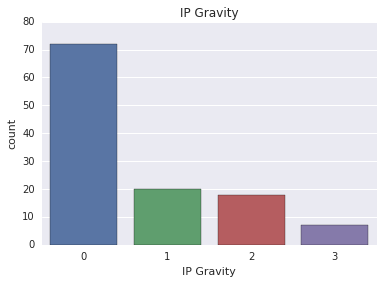

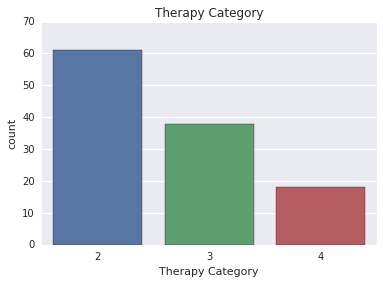

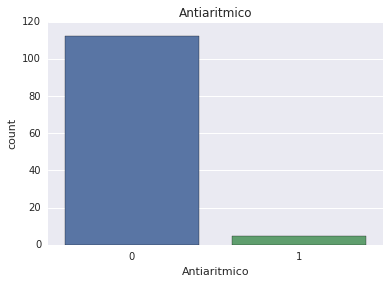

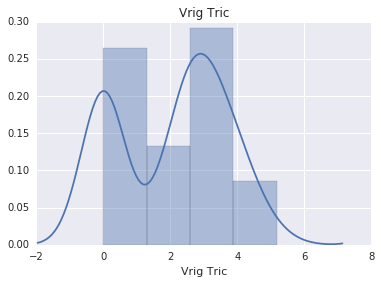

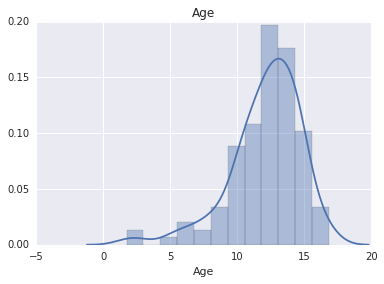

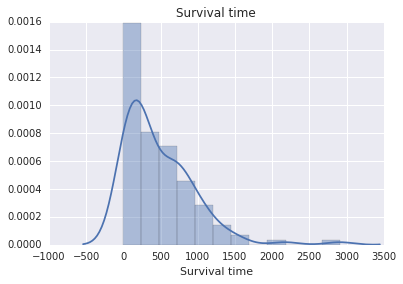

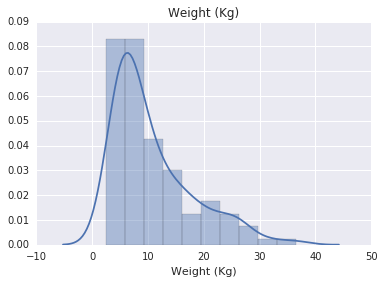

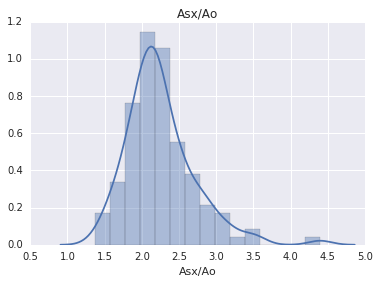

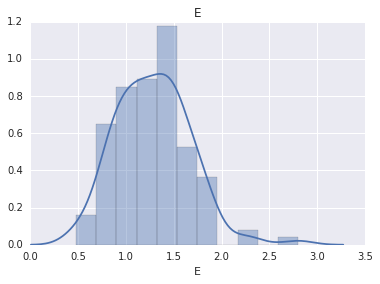

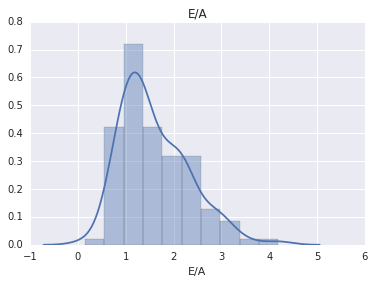

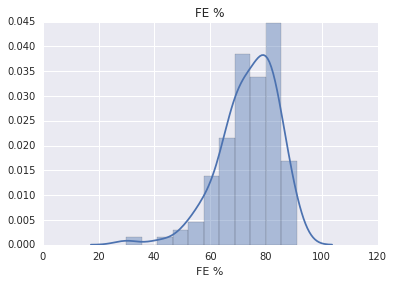

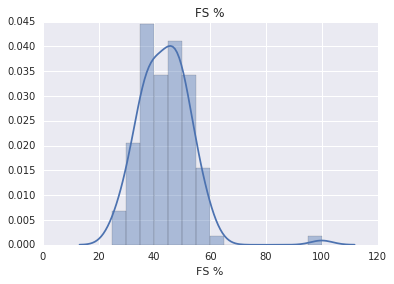

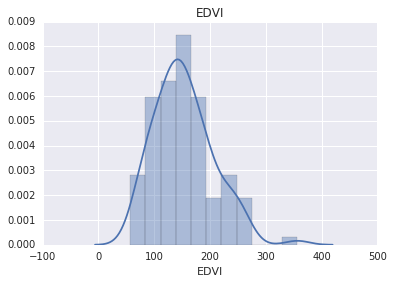

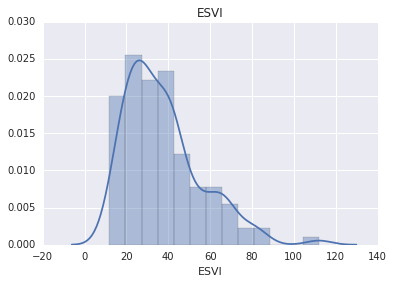

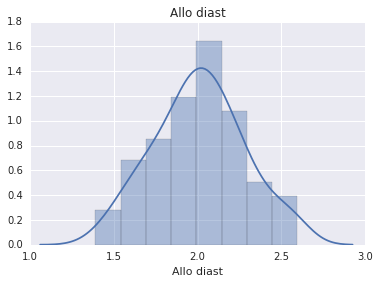

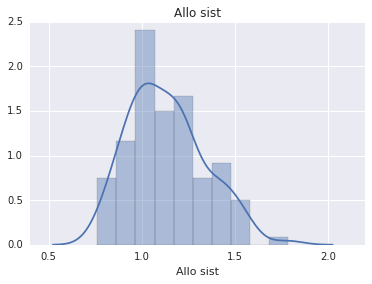

In [3]:
for categ_feat in ["IP Gravity", "Therapy Category", "Antiaritmico"]:
    plt.title(categ_feat)
    sns.countplot(x=categ_feat, data=dogs)
    plt.show()
for feat in ["Vrig Tric", "Age", "Survival time", "Weight (Kg)", "Asx/Ao", "E", "E/A", "FE %", "FS %", "EDVI", "ESVI", "Allo diast", "Allo sist"]:
    plt.title(feat)
    sns.distplot(dogs[feat])
    plt.show()

**Correlation Heatmap**

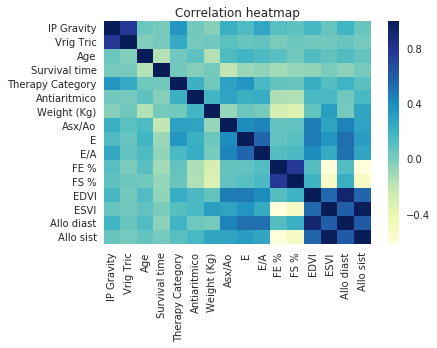

In [4]:
plt.title("Correlation heatmap")
sns.heatmap(dogs.corr(), cmap="YlGnBu")
plt.show()

**Joint plots of Survival time with features**

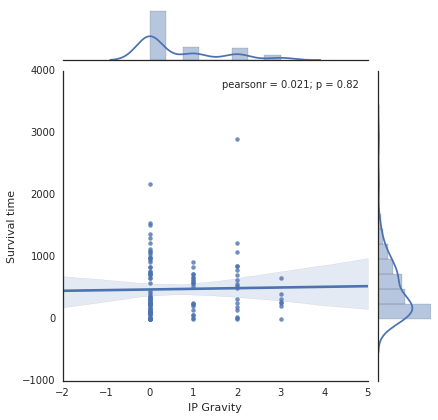

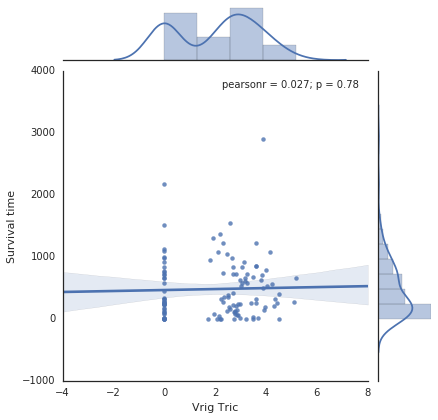

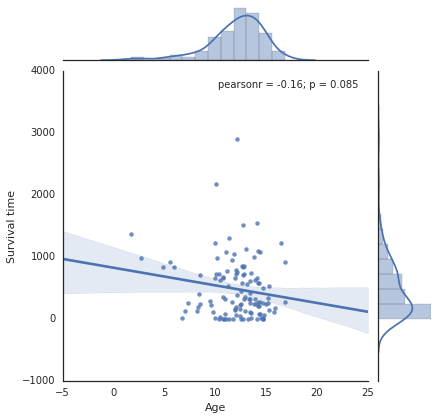

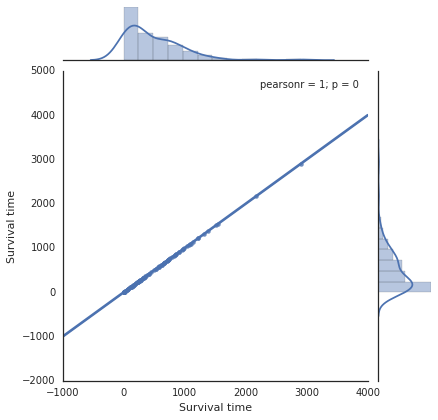

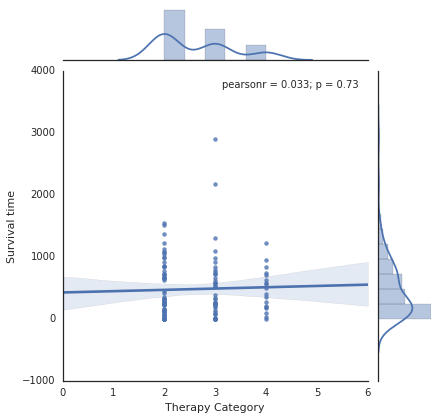

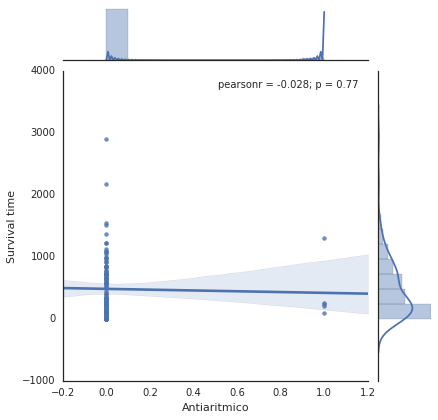

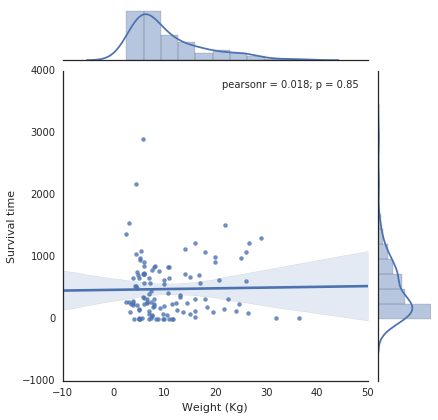

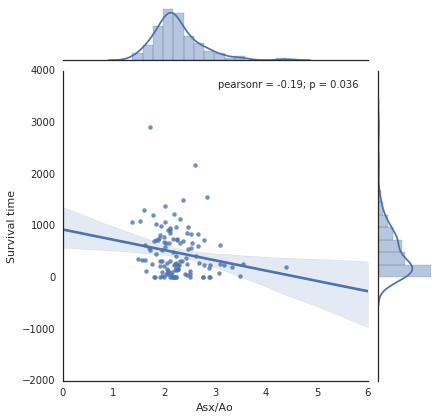

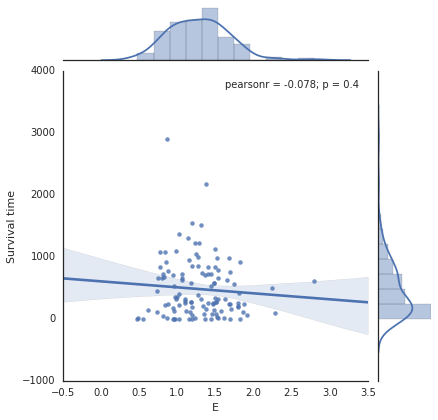

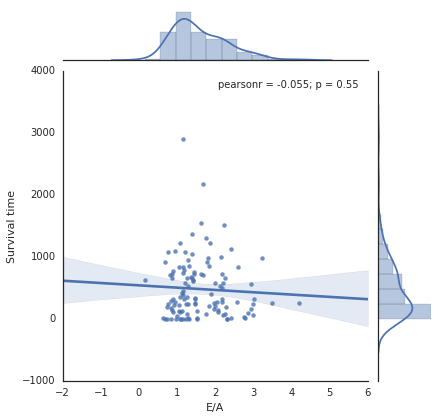

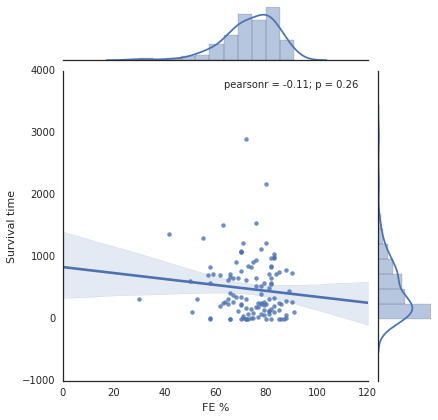

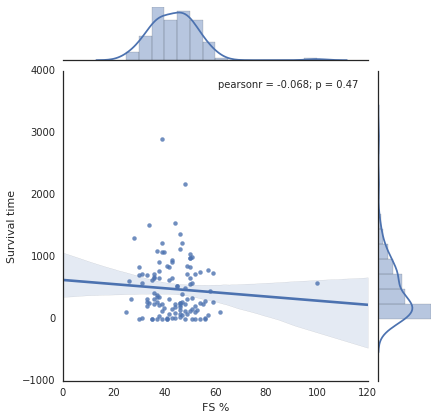

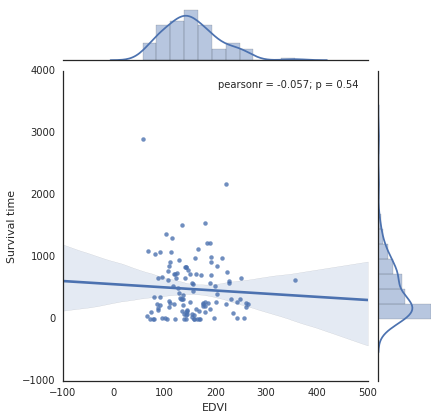

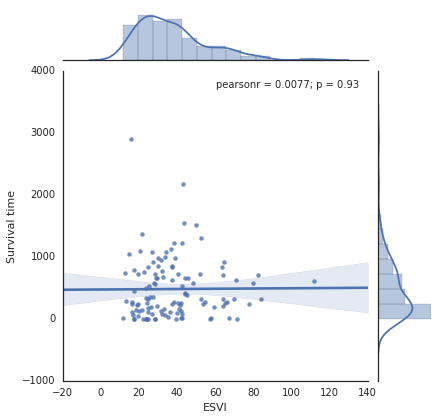

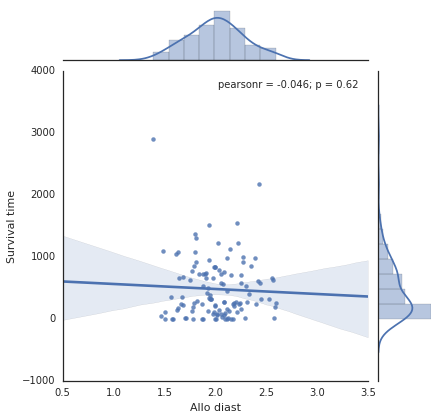

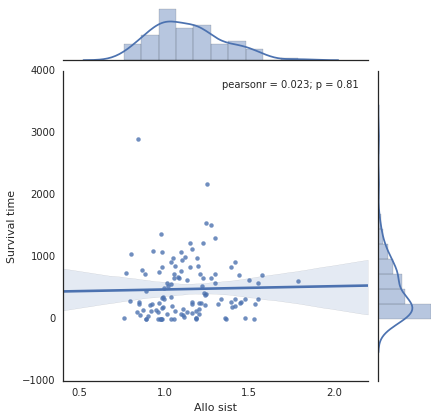

In [5]:
with sns.axes_style('white'):
    for feat in list(dogs.columns.values):
        sns.jointplot(feat, "Survival time", dogs, kind='reg')
        plt.show()

# SV Regressions

In [6]:
dogs = load_skl_dogs_2016(scaler=StandardScaler())
dogs.data.shape

(117, 15)

In [12]:
print("Linear SVR")
svr_lin = svm.SVR(C=4, epsilon=0.1, kernel='linear')
X, y = dogs.data, dogs.target
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 1/5)
svr_lin.fit(X_Train,y_Train)
print("Score: %f" % svr_lin.score(X_Test,y_Test))

Linear SVR
Score: -0.023789


In [13]:
print("Rbf SVR")
svr = svm.SVR(C=4, epsilon=0.1, gamma=0.001, kernel='rbf')
X, y = dogs.data, dogs.target
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 1/5)
svr.fit(X_Train,y_Train)
print("Score: %f" % svr.score(X_Test,y_Test))

Rbf SVR
Score: -0.028166


In [14]:
print("Nu SVR")
nusvr = svm.NuSVR(C=1, nu=0.5, gamma=0.0001, kernel='rbf')
X, y = dogs.data, dogs.target
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 1/5)
nusvr.fit(X_Train,y_Train)
print("Score: %f" % nusvr.score(X_Test,y_Test))

Nu SVR
Score: -0.063506


In [21]:
print("SVR with grid search model selection\n")

X, y = dogs.data, dogs.target
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size = 1/5)

param_grid = [
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'kernel': ['linear']},
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [0.5, 1, 2, 4, 8, 16], 'epsilon':[0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'degree': [1,2,3], 'coef0': [-100, -10, -1, 0, 1, 10, 100], 'kernel': ['poly']}
 ]

svreg = GridSearchCV(svm.SVR(), param_grid, cv=2, n_jobs=4)
svreg.fit(X_Train, y_Train)

print("Best parameters set found on development set:")
print(svreg.best_params_)
print("Test score: %f" % svreg.score(X_Test,y_Test))

SVR with grid search model selection

Best parameters set found on development set:
{'kernel': 'poly', 'degree': 3, 'C': 8, 'epsilon': 10, 'gamma': 0.1, 'coef0': -1}
Test score: -0.260563
